## Week 3-1 - Linear Regression - homework

This assignment is inspired by a 2006 [story in the Pioneer Press](
https://www.twincities.com/2010/07/09/schools-that-work-despite-appearances-schools-doing-better-than-expected-have-traits-in-common/) which asked, what makes a school succeed despite disadvantages? The reporters performed a regression of standardized test scores vs. the number of low income students at that school (actually we only have the number of students who are eligable for free meals at school, but this is a widely used proxy for the economic status of the students.)

The 2006 story explains the purpose of doing the regression:

"Schools with large numbers of students from low-income families — or who move often, are learning English or have other special needs — almost always fare worse on standardized tests, most educators agree. The Pioneer Press analyzed three years of test scores from all 731 Minnesota elementary schools to predict how well each school should do when its percentage of low-income students is taken into account — effectively leveling the playing field between the haves and have-nots."

The reporters then visited those schools that out-performed their predicted scores, trying to determine what made them succeed despite the odds.

This file was adapted from a notebook created by Chase Davis and Richard Dunks for the 2015 version of this course, gratefully used with permission.


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

### 1. Load the data

Load the file and take a look. Each row is one school. The fields all have abbreviated names, and you can look at the [data dictionary](http://www.cde.ca.gov/ta/ac/ap/reclayout12b.asp) to see what's what.

This is standardized test score results and many other variables for schools in California, from 2012. We are going to be looking at a variable called the Academic Performance Index (API) which is basically standardized test scores. This way of measuring school performance has was discontinued in 2017, but we're going to use this data anyway, because we can closely reproduce the original Pioneer Press analysis.


In [4]:
# Load `apib12tx.csv` and take a look at the raw data
df = pd.read_csv('week-3/apib12tx.csv')
df.head()

,CHARTER,SNAME,DNAME,CNAME,API12B,ST_RANK,PCT_AA,PCT_AI,PCT_AS,PCT_FI,...,ACS_K3,ACS_46,ACS_CORE,PCT_RESP,NOT_HSG,HSG,SOME_COL,COL_GRAD,GRAD_SCH,AVG_ED
0,NaN,William Faria Elementary,Cupertino Union,Santa Clara,998,10,0,1,96,0,...,26.0,33.0,NaN,95,1,1,1,22,76,4.72
1,NaN,Millikin Elementary,Santa Clara Unified,Santa Clara,998,10,0,0,74,2,...,30.0,33.0,NaN,100,0,2,9,33,56,4.44
2,NaN,Manchester Gate,Fresno Unified,Fresno,998,10,4,1,11,1,...,31.0,32.0,NaN,84,5,8,29,26,32,3.71
3,NaN,Murdock-Portal Elementary,Cupertino Union,Santa Clara,997,10,0,1,95,0,...,23.0,30.0,NaN,99,0,0,0,14,85,4.85
4,NaN,Mission San Jose Elementary,Fremont Unified,Alameda,996,10,0,1,91,0,...,27.0,30.0,NaN,99,0,1,3,22,74,4.68


### 2. Looking at one variable at a time

To start with, let's look at some histograms of single variables, to get an idea what the data (and the students) look like.

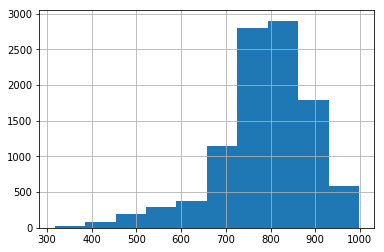

In [5]:
# Make a histogram of the API12B column, which is standardized test scores for grade 12
df['API12B'].hist()

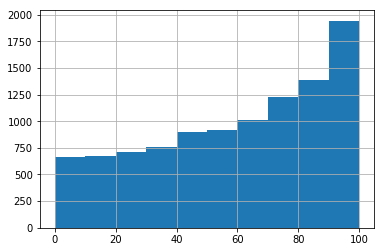

In [6]:
# Make a histogram of the MEALS column, which is the percentage of students enrolled in free/reduced-price lunch programs, which is often used as a proxy for poverty.
df['MEALS'].hist()


You also find it interesting to look at variables like `PCT_WH` which is the percentage of white students, and `AVG_ED` which is the average education level of the parents of the students at that school.

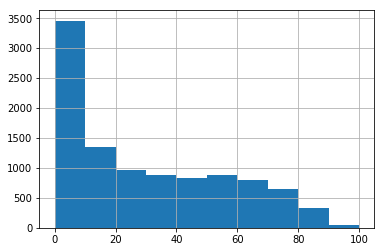

In [7]:
df['PCT_WH'].hist()

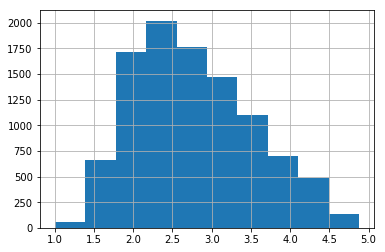

In [8]:
df['AVG_ED'].hist()

### 3. Looking at two variables at a time

Looking at histograms of one variable at a time cant't tell us about the relationship between variables, so let's do some scatter plots to get a qualitative sense of the relationships.

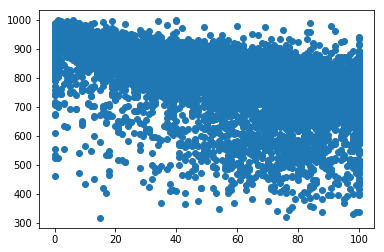

In [10]:
# Make a scatter plot of test scores (`API12B`) vs the percentage of students with subsidized lunches (`MEALS`)

plt.scatter(x=df['MEALS'], y=df['API12B'])

As expected, test scores decrease with an increasing fraction of students in poverty. The parents' education is also strongly correlated with test scores.

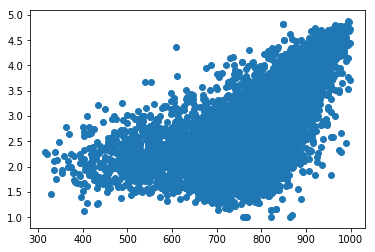

In [11]:
# Make a scatter plot of test scores vs parents' education (`AVG_ED`)
plt.scatter(x=df['API12B'], y=df['AVG_ED'])

## Linear regression

Let's draw trend lines through these scatter plots. Or, more precisely, we're going to use single variable linear regression to build a model of the relationship between two variables (test scores, which is the "dependent" variable, and one "independent" variable.")

Let's start with text scores vs. our poverty proxy.

In [13]:
# To start with, let's have the MEALS variable on the X axis and the API12B variable on the Y axis 
# This is some drudgery to convert dataframes into the NumPy arrays that sklearn needs
x = df[['MEALS']].values
y = df[['API12B']].values

In [14]:
# Make a LinearRegression object and fit our data to it 
lm = LinearRegression()
lm.fit(x, y)

/Users/km/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now let's see what we've got. Make the scatter plot of scores vs. meals, and add the regression line

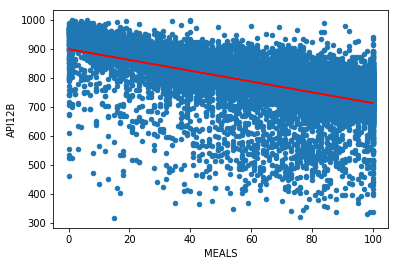

In [20]:
# scatter plot of test scores vs percentage of students eligable for subsidized meals
m = lm.coef_[0]
b = lm.intercept_
df.plot(kind='scatter', x='MEALS', y='API12B')
plt.plot(df['MEALS'], m * df['MEALS'] + b, '-', color='red')

In [21]:
# What is the slope of this line? That is, how many test score points do we lose 
# for every percentage point increase in students receiving subsidized meals?
m

array([-1.85881873])

In [22]:
# And what is the intercept? That is, what does the model predict for MEALS=0?
b

array([898.37836133])

We now have a model that predicts test performance based on the number of students receiving subsidized meals. This is a pretty naive mdodel, but it's a start. And we can already learn things from it: there are some schools that seem to be doing much better than would be expected given the number of impoverished students attending. Essentially by, subtracting off the regression line we are "taking poverty out of the equation."

Let's take a look at some of these schools. 

In [24]:
# Print out all schools with MEALS greater than 80 and API12B > 900
df[(df['MEALS'] >= 80) & (df['API12B'] > 900)]['SNAME']

15                 Chin (John Yehall) Elementary
51      American Indian Public Charter School II
161                          KIPP Raices Academy
207                           Lincoln Elementary
221                         Oakland Charter High
445                           Richardson Prep Hi
510                      Synergy Charter Academy
542                            Sixth Street Prep
683         KIPP Los Angeles College Preparatory
702           Rocketship Mateo Sheedy Elementary
739                     Solano Avenue Elementary
788                     Laurel Street Elementary
865                          Middle College High
939            Design Science Early College High
964                              Frank Lanterman
1054       Futuro College Preparatory Elementary
1071                      KIPP Heartwood Academy
Name: SNAME, dtype: object

Let's look specifically at Solano Avenue Elementary, which has an `API12B` of 922 and 80 percent of students being in the free/reduced lunch program. 

How well would we expect this school to do, based on its `MEALS` of 80?

In [25]:
# Use the linear model to predict the score for this school
m * 80 + b

array([749.6728627])

With an index of 922, clearly the school is overperforming what our simplified model expects. What is different about this school? Use your favorite search engine to look for relevant articles and see if you can figure out anything that might matter (remembering that our data is from 2012)

http://articles.latimes.com/1995-06-21/local/me-15425_1_central-los-angeles

Probably because it is a rather small school, with highly motivated teachers and a large community of volounteers that support the school and students.